In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

C:\Users\Ahmad Awais\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = pd.read_csv("path") 

In [3]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train_data=train_data.drop(columns="id")

In [9]:
train_data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
train_data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [11]:
train_data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

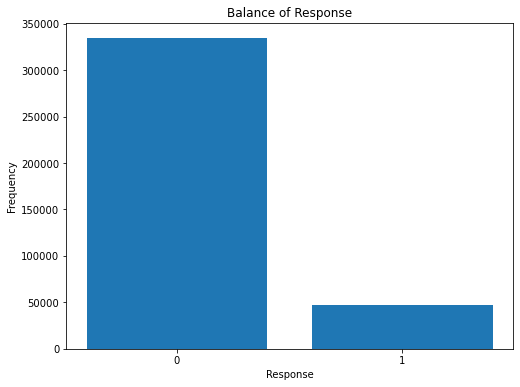

In [12]:
# Assuming you have a DataFrame named 'train_data' and want to check the balance of the 'Response' column
column_name = 'Response'

# Count the frequency of each unique value in the column
value_counts = train_data[column_name].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Balance of {column_name}')
plt.xticks(rotation=0)  # Set rotation to 0 to display x-axis labels horizontally
plt.show()


In [13]:
# Separate the majority and minority classes
majority_class = train_data[train_data['Response'] == 0]
minority_class = train_data[train_data['Response'] == 1]


# Determine the size of the minority class
minority_size = len(minority_class)

# Randomly sample instances from the majority class to match the minority size
majority_downsampled = majority_class.sample(n=minority_size, random_state=42)

# Combine the minority class and downsampled majority class to create the balanced dataset
balanced_df = pd.concat([majority_downsampled, minority_class], axis=0)

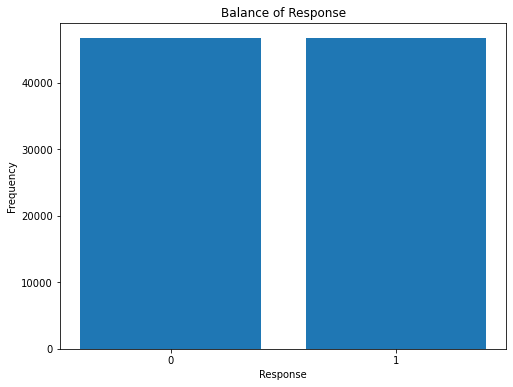

In [14]:
# Assuming you have a DataFrame named 'train_data' and want to check the balance of the 'Response' column
column_name = 'Response'

# Count the frequency of each unique value in the column
value_counts = balanced_df[column_name].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Balance of {column_name}')
plt.xticks(rotation=0)  # Set rotation to 0 to display x-axis labels horizontally
plt.show()


In [15]:
balanced_df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000,93420.000000
mean,40.819139,0.998480,26.557878,0.263091,30989.222265,103.463252,154.683933,0.500000
std,14.359740,0.038958,12.641932,0.440314,17695.332595,55.826473,83.575008,0.500003
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,27.000000,1.000000,16.000000,0.000000,24506.000000,26.000000,82.000000,0.000000
50%,41.000000,1.000000,28.000000,0.000000,32237.500000,124.000000,155.000000,0.500000
75%,50.000000,1.000000,34.000000,1.000000,40312.000000,152.000000,227.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
balanced_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
79509,Female,22,1,19.0,1,< 1 Year,No,54559.0,152.0,87,0
186554,Male,57,1,18.0,0,1-2 Year,Yes,33439.0,124.0,63,0
158036,Female,64,1,28.0,0,1-2 Year,Yes,39327.0,122.0,45,0
343705,Male,52,1,41.0,1,1-2 Year,No,26536.0,124.0,161,0
137902,Female,21,1,7.0,0,< 1 Year,No,28416.0,152.0,92,0


In [17]:
X=balanced_df.drop(columns="Response")
y=balanced_df.Response

In [18]:
# Assuming you have a DataFrame 'df' with multiple object columns, including a target column
target_column = 'Response'  # Replace 'target' with the actual name of your target column

# Get a list of all object columns excluding the target column
object_columns = [col for col in X.select_dtypes(include=['object']).columns]

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each object column
for col in object_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [19]:
scaler = StandardScaler()

In [20]:
x_scaler = scaler.fit_transform(X)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, test_size=0.3)

In [22]:
Logistic_Model=LogisticRegression()

In [23]:
Logistic_Model.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_predict=Logistic_Model.predict(x_test)

In [25]:
report=classification_report(y_test, y_predict)

In [26]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     13811
           1       0.71      0.98      0.82     14215

    accuracy                           0.79     28026
   macro avg       0.84      0.78      0.78     28026
weighted avg       0.83      0.79      0.78     28026



In [27]:
Decision_Tree_Model = DecisionTreeClassifier()

In [28]:
Decision_Tree_Model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
predicted=Decision_Tree_Model.predict(x_test)

In [30]:
report = classification_report(y_test, predicted)

In [31]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     13811
           1       0.72      0.71      0.72     14215

    accuracy                           0.71     28026
   macro avg       0.71      0.71      0.71     28026
weighted avg       0.72      0.71      0.71     28026



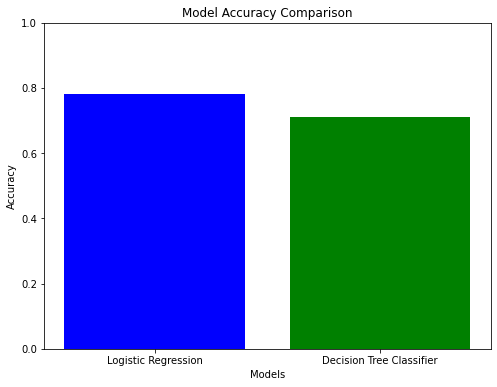

In [33]:
accuracy_model_1 = 0.78
accuracy_model_2 = 0.71

# Names of the models
model_names = ['Logistic Regression', 'Decision Tree Classifier']

# Accuracy scores for each model
accuracy_scores = [accuracy_model_1, accuracy_model_2]  # Replace with your actual accuracy scores

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy)
plt.show()


In [41]:
preprocessed_dataset=pd.concat([X,y], ignore_index=True)

Gender                  float64
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age             float64
Vehicle_Damage          float64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
0                       float64
dtype: object